In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

   # About Case Study

**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill  offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

## Objective

* Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate       tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal               probabilities along with their insights/impact on the business.

#### Loading Dataset & Data Exploration

In [2]:
aerofit = pd.read_csv("\\Users\\Admin\\Desktop\\Python\\aerofit_treadmill.csv")

In [3]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### Dataset Characteristics

Dataset contains following columns

* **Product Purchased** : KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
* **Age** : In years, age of the customer who purchased
* **Gender** : Gender of the purchased customer
* **Education** : represented in years
* **Marital Status** : Single or partnered
* **Usage** : The average number of times the customer has planned to use the treadmill each week
* **Fitness** : Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
* **Miles** : The average number of miles the customer expects to walk or run each week
* **Income** : Annual income of the user in Dollars $

In [4]:
aerofit.shape

(180, 9)

    Dataset contains 180 rows and 9 columns

In [5]:
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


   * Product, Gender and Marital Status are object(string)
   * Age, Education, Usage, Fitness, Income and Miles are in int64(integer)

#### Missing Value

In [7]:
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

    No Null values found in any columns

In [8]:
aerofit.duplicated().sum()

0

    No duplicates have been observed

In [9]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Descriptive Analysis

* Total count of all columns is 180.
* Age: Mean age of the customer is 28 years, half of the customer's mean age is 26 and 75% of the customer age is 33.
* Education: Mean Education is 15 with maximum as 21 and minimum as 12.
* Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* Fitness: Average rating is 3.3 on a scale of 1 to 5 with most common fitness rating is 4.
* Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
* Income (in $): Most customer earns around 58K annually, with maximum of 104K, minimum almost 30K and average 54k per year.

## Non-Graphical Analysis: Value counts and unique attributes


In [10]:
aerofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [11]:
# unique list of product ids
aerofit['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [12]:
# Number of customers with 3 different product types
aerofit['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [13]:
# list of unique ages
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [14]:
# list of unique Educations
aerofit['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [15]:
# Number of Male and Female customers
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [16]:
# Number of customer againts the rating scale 1 to 5
aerofit['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [17]:
# Number of customers counts on Usage
aerofit['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [18]:
# Number of Single and Partnered customers
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### Summary

* KP281, KP481, KP781 are the 3 different products
* Most commonly purchased treadmill product type is KP281
* There are 32 unique ages
* 104 Males and 76 Females are in the customers list
* 8 unique set of Education in years(14, 15, 12, 13, 16, 18, 20, 21)
* Highest rated Fitness rating is 3
* Most customers usage treadmill atleast 3 days per week
* Majority of the customers who have purchased are Married/Partnered


### Conversion of categorical attributes to 'category'

In [19]:
# Converting Int data type of fitness rating to object data type
aerofit_cat = aerofit
aerofit_cat['Fitness_category'] = aerofit.Fitness
aerofit_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [20]:
aerofit_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
aerofit_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of Fitness Rating to following categories:-

1. Poor Shape
2. Bad Shape
3. Average Shape
4. Good Shape
5. Excellent Shape

In [21]:
# for unique list of products, listed in percentage
pro = aerofit['Product'].value_counts(normalize=True)
stats = pro.map(lambda calc: round(100*calc,2))
stats

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

* 44.44% of customers bought KP281 product type
* 33.33% of customers bought KP481 product type
* 22.22% of customers bought KP781 product type

In [22]:
# Customer Gender statistics (listed in %)
gender = aerofit['Gender'].value_counts(normalize=True)
gender_stats = gender.map(lambda calc: round(100*calc,2))
gender_stats

Male      57.78
Female    42.22
Name: Gender, dtype: float64

* 57.78% of customers are Male and 42.22% customers are Female

In [23]:
# Customers Marital Status (listed in %)
marital_status = aerofit['MaritalStatus'].value_counts(normalize=True)
marital_stats = marital_status.map(lambda calc:round(100*calc,2))
marital_stats

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

* 59.44% of customers are Married/Partnered
* 40.56% of customers are Single

In [24]:
# Usage: Number of days used per week (listed in %)
usage = aerofit['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


* Around 39% of customers use 3 days per week
* Less than 2% of customers use 7 days per week

In [25]:
# Customer rating of their fitness (listed in %)
rating = aerofit['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


* More than 53% of customers have rated themselves as average in fitness (rated 3)
* 14% of customers have rated their fitness less than average
* Over 17% of customers have peak fitness ratings

# Visual Analysis - Univariate & Bivariate


### Univariate Analysis
#### For Continous Variable(s):Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

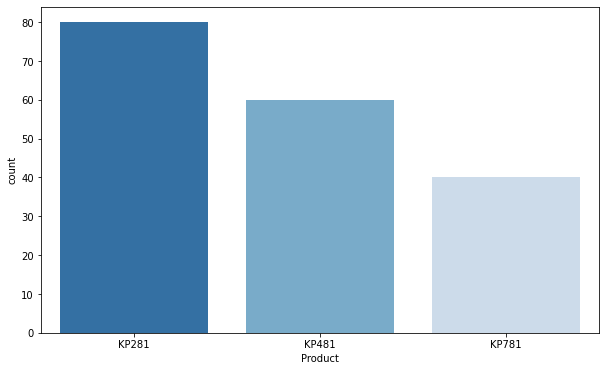

In [27]:
# Product Analysis - count plot
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='Product',palette='Blues_r')
plt.show

* KP281 is the most commonly purchase product type
* KP481 is the second most top product type purchased
* KP781 is the least purchased product type

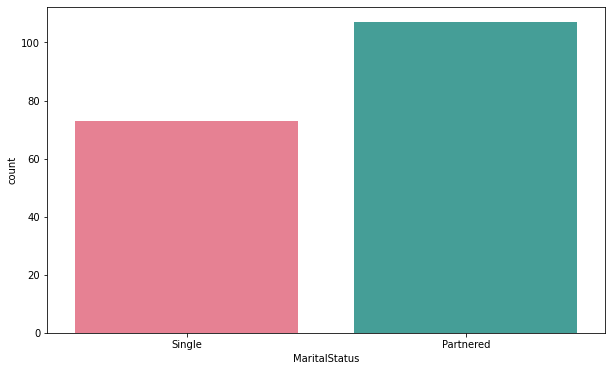

In [28]:
# Marital Status Analysis - Count plot
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='MaritalStatus',palette='husl')
plt.show()

* Most of the products purchased by couples/Married/Partnered customer category

<function matplotlib.pyplot.show(close=None, block=None)>

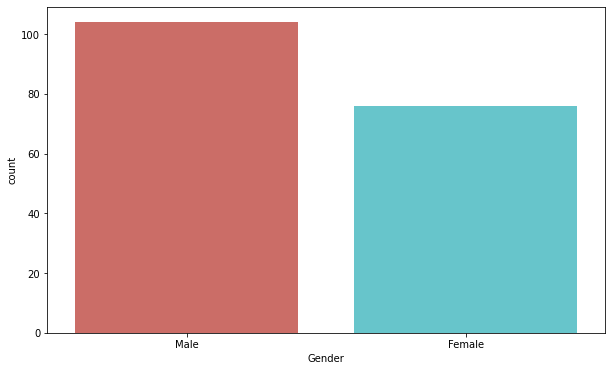

In [29]:
# Gender Analysis - Count Plot
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='Gender',palette='hls')
plt.show

* Most products purchased by Males
* Females are less interested in the product compared to Males

<function matplotlib.pyplot.show(close=None, block=None)>

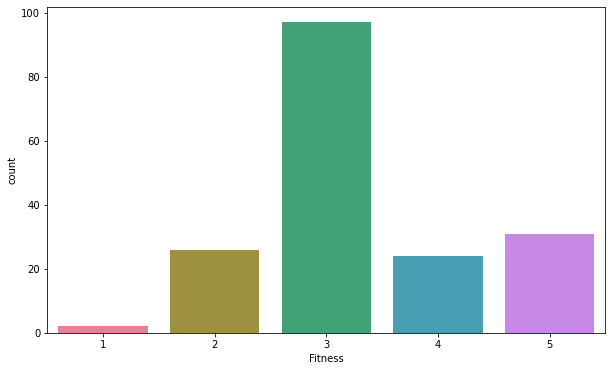

In [30]:
# Fitness rating analysis - count plot
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='Fitness',palette='husl')
plt.show

* More than 90 customers have rated their physical fitness rating as Average
* Excellent shape is the second highest rating provided by the customers

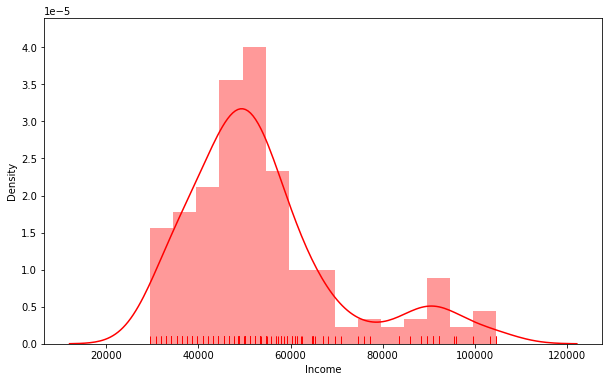

In [31]:
# Income Analysis - Distplot
plt.figure(figsize = (10,6))
sns.distplot(aerofit.Income,rug=True,color='red')
plt.show()

* Most of customers who have purchased the product have a average income between 40K to 60K
* Average Income density is over 3.0

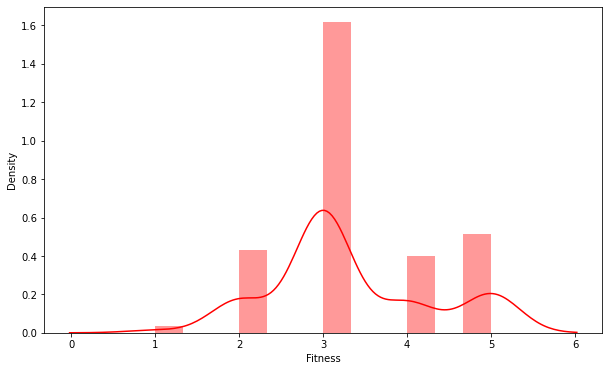

In [32]:
# Fitness Rating Analysis - Distplot
plt.figure(figsize = (10,6))
sns.distplot(aerofit.Fitness,color='red')
plt.show()

* Over 1.5 density customer population have rated their physical fitness rating as Average
* Second highest customer population density have rated Excellent shape as their fitness rating

<AxesSubplot:xlabel='Income', ylabel='Count'>

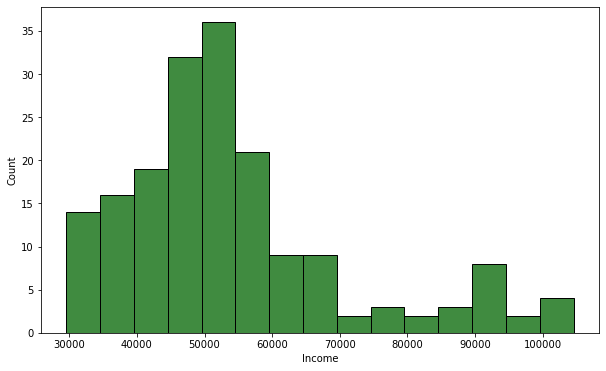

In [33]:
# Income Analysis - Histogram
plt.figure(figsize = (10,6))
sns.histplot(data=aerofit,x='Income',color='darkgreen')

* More than 35 customers earn 50-55K per year
* More than 30 customers earn 45-50K per year
* More than 20 customers earn 55-60K per year

<AxesSubplot:xlabel='Education', ylabel='Count'>

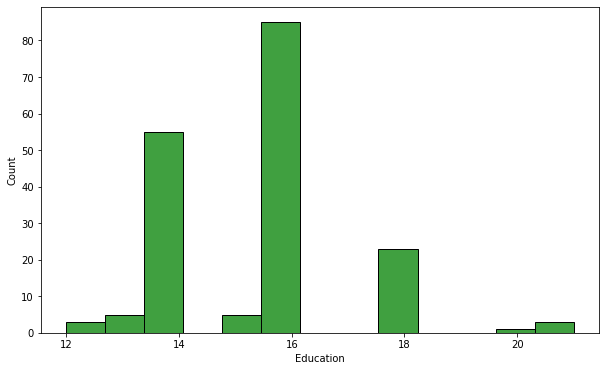

In [34]:
# Education Analysis - Histogram
plt.figure(figsize = (10,6))
sns.histplot(data=aerofit,x='Education',color='green')

* Highest number of customers have 16 years as their Education
* 14 years is the second highest education among the customers
* 20 years is the least education among the customers

<AxesSubplot:xlabel='Usage', ylabel='Count'>

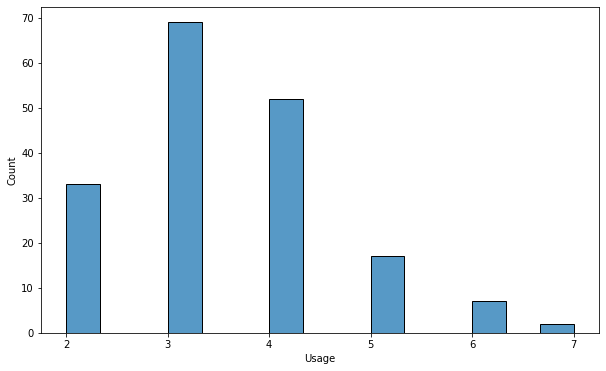

In [35]:
# Usage Analysis - Histogram
plt.figure(figsize = (10,6))
sns.histplot(data=aerofit,x='Usage')

* 3 days per week is the most common usage among the customers
* 4 days and 2 days per week is the second and third highest usage among the customers
* Very few customers use product 7 days per week

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

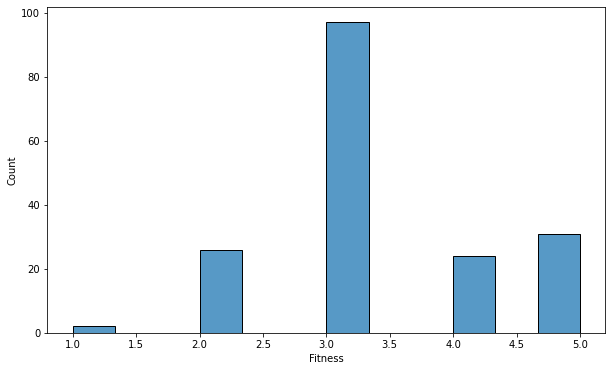

In [36]:
# Fitness Analysis - Histogram
plt.figure(figsize = (10,6))
sns.histplot(data=aerofit,x='Fitness')

* Average shape is the most rating customers have given for fitness rating
* Around 40 customers have stated Excellent Shape as fitness rating


#### For categorical variable(s): Boxplot

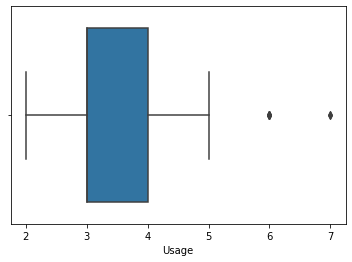

In [37]:
# Usage Analysis - Box plot
sns.boxplot(data=aerofit,x='Usage')
plt.show()

* 3 to 4 days is the most preferred usage days for customers
* 6 and 7 days per week is roughly the usage days for few customers (Outliers)

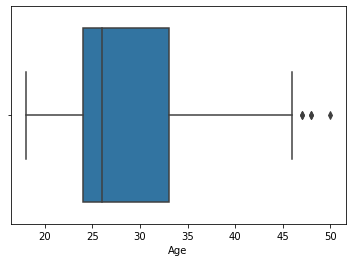

In [38]:
# Age Analysis - Box plot
sns.boxplot(data=aerofit,x='Age')
plt.show()

* 23 to 34 is the most common customer age group that has purchased the product
* Above 45 years old customers are very few compared to the young age group given in the dataset(outliers)

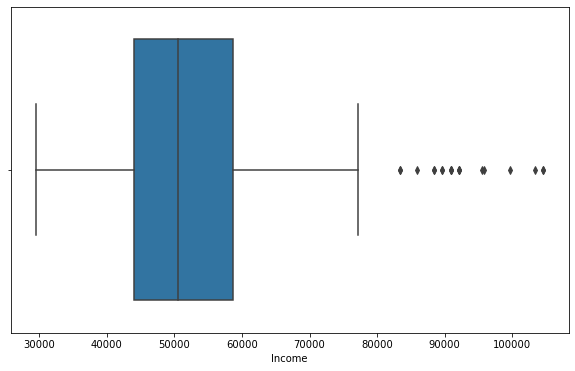

In [39]:
# Income Analysis - Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=aerofit,x='Income')
plt.show()

* Few customers have income above 80K per annum(Outliers)
* Most customers earn from 45K to around 60K per annum

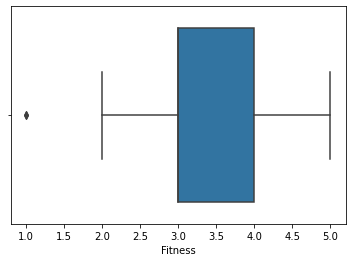

In [40]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=aerofit,x='Fitness')
plt.show()

* Couple of customers have rated their fitness rating as 1 - Poor Shape
* Most customers have rated fitness rating as 3.0 to 4.0


#### For correlation: Heatmaps, Pairplots

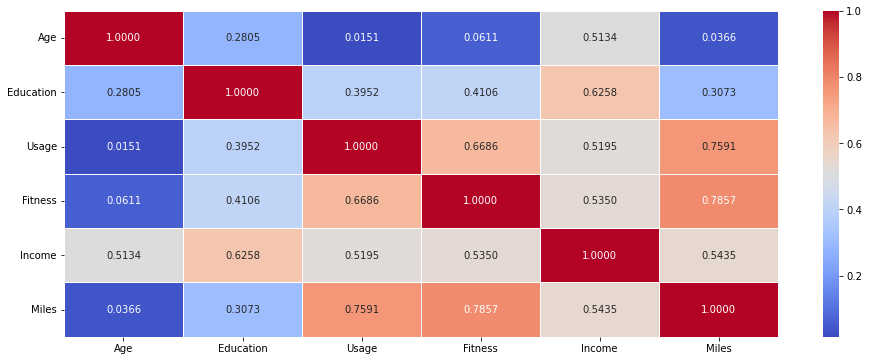

In [41]:
#Correlation HeatMap
plt.figure(figsize=(16,6))
ax = sns.heatmap(aerofit.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

* Correlation between Age and Miles is 0.03
* Correlation between Education and Income is 0.62
* Correlation between Usage and Fitness is 0.66
* Correlation between Fitness and Age is 0.06
* Correlation between Income and Usage is 0.51
* Correlation between Miles and Age is 0.03

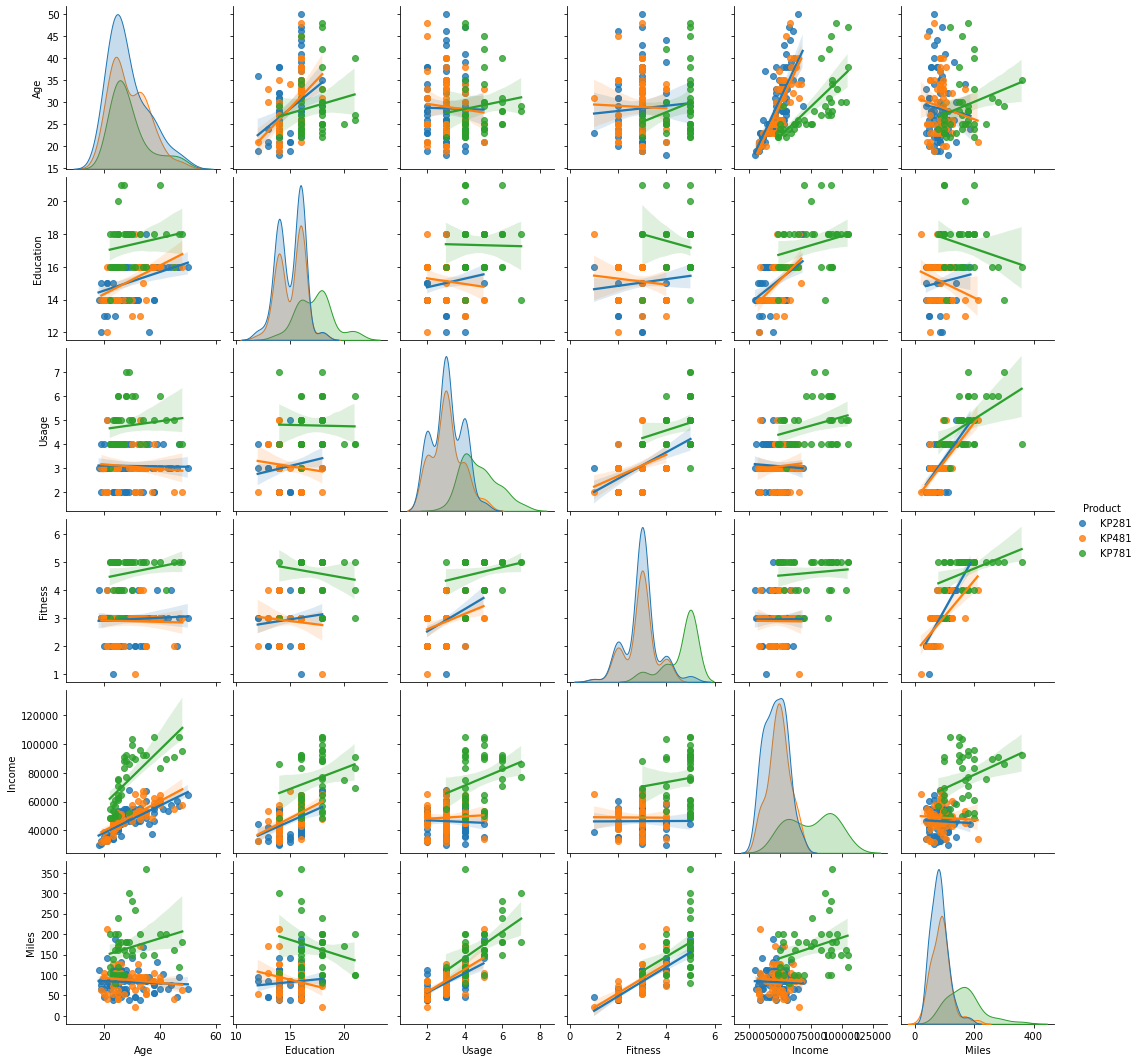

In [42]:
# Product Analysis - Pair Plot
sns.pairplot(aerofit,hue='Product',kind='reg')
plt.show()

In the above pairplot the correlation with products and different attributes are as similar to previous observation

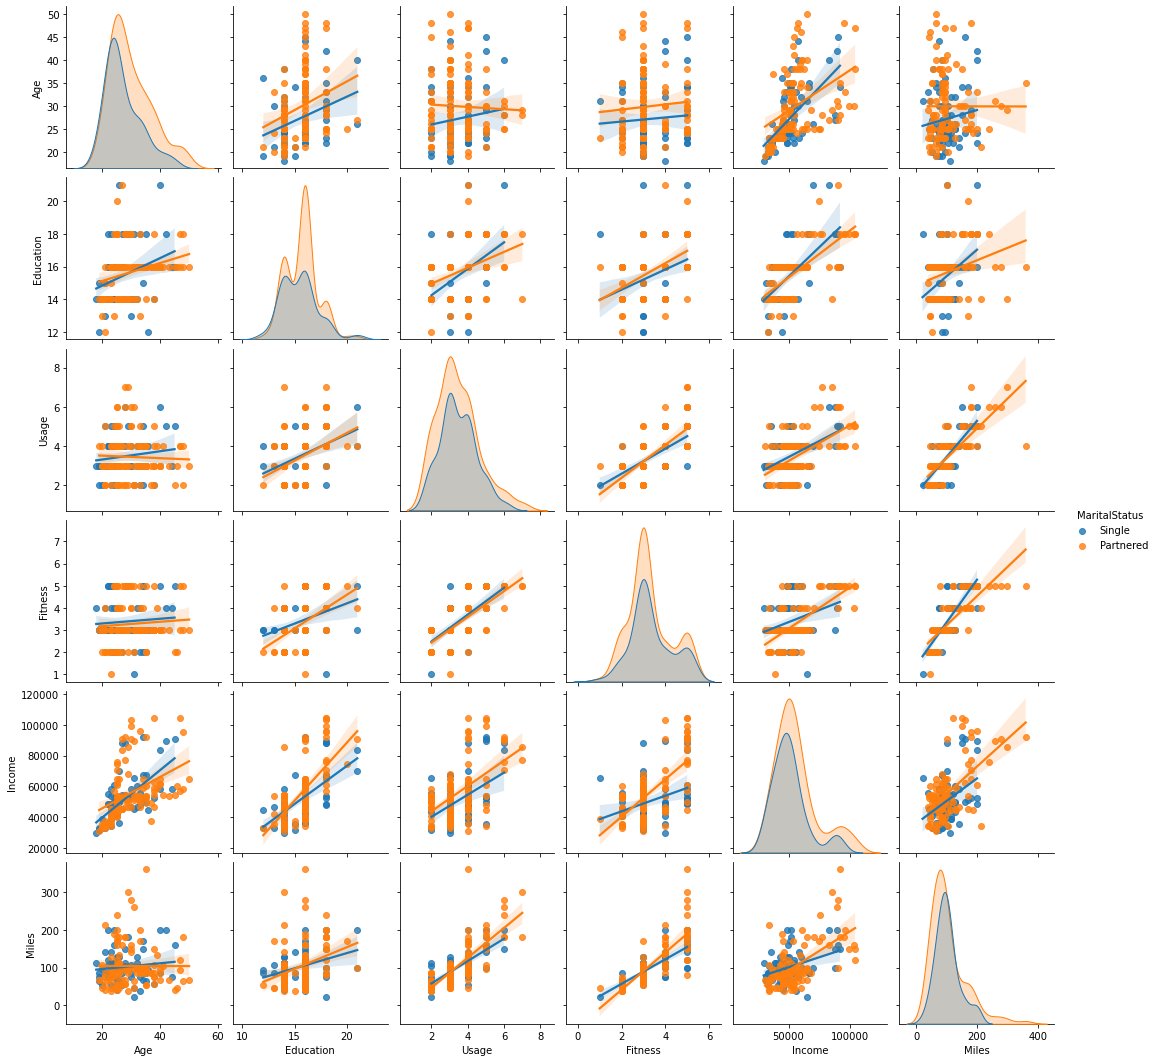

In [43]:
# Marital Status - pair plot
sns.pairplot(aerofit,hue='MaritalStatus',kind='reg')
plt.show()

In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer

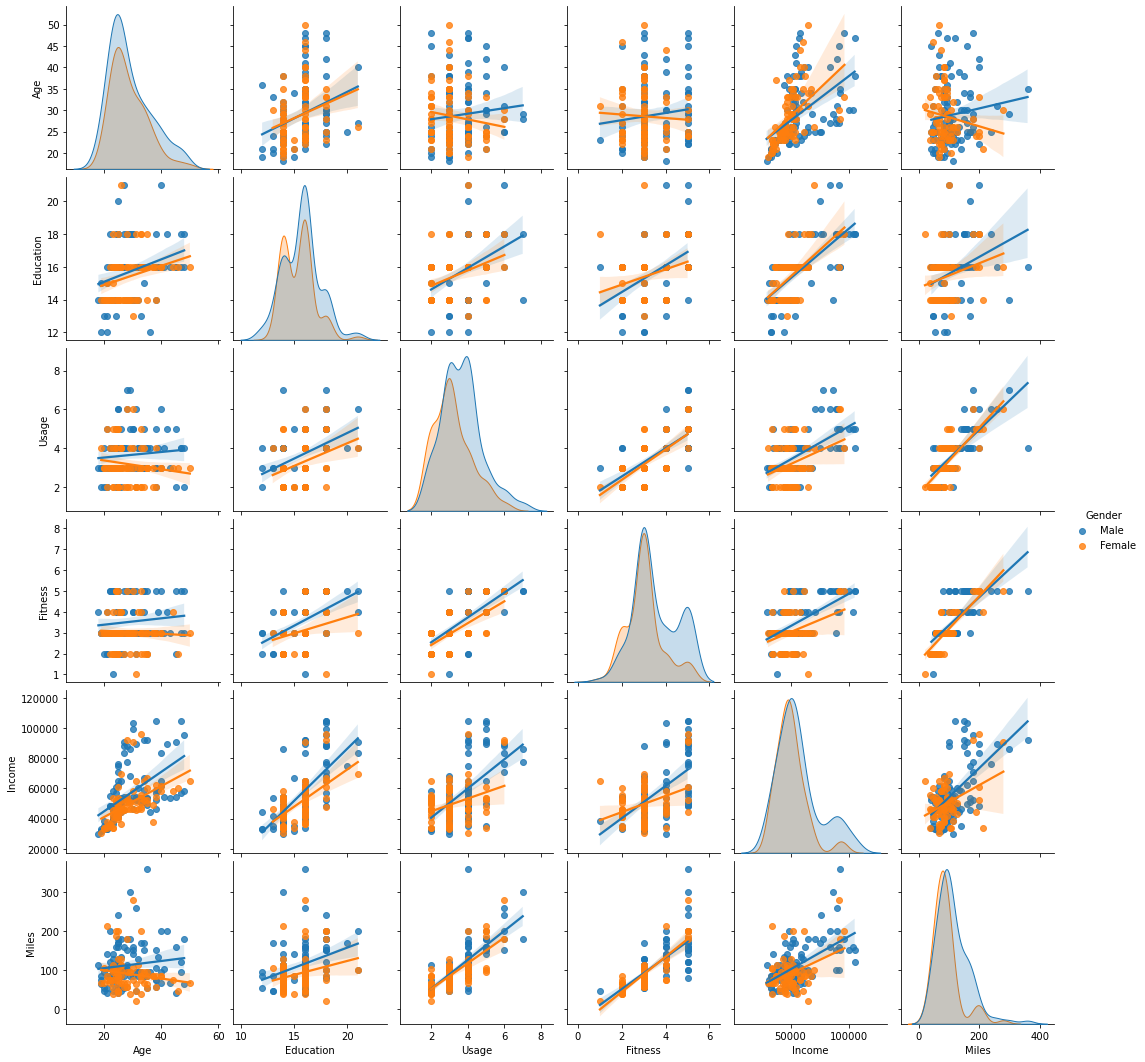

In [44]:
# Gender Analysis - Pair Plot
sns.pairplot(aerofit,hue='Gender',kind='reg')
plt.show()

Here the pair plot's correlation is same as the above mentioned heatmap


### Bivariate Analysis

In [45]:
# Average usage per week of each product type by the customer
aerofit.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

* Mean usage for product KP281 is 3.08
* Mean usage for product KP481 is 3.06
* Mean usage for product KP781 is 4.77

In [46]:
# Average Age of customer using each product
aerofit.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

* Mean Age of the customer who purchased product KP281 is 28.55
* Mean Age of the customer who purchased product KP481 is 28.90
* Mean Age of the customer who purchased product KP781 is 29.10

In [47]:
# Average Education of customer using each product
aerofit.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

* Mean Education qualification of the customer who purchased product KP281 is 15.03
* Mean Education qualification of the customer who purchased product KP481 is 15.11
* Mean Education qualification of the customer who purchased product KP781 is 17.32

In [48]:
# Average customer fitness rating for each product type purchased
aerofit.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

* Customer fitness mean for product KP281 is 2.96
* Customer fitness mean for product KP481 is 2.90
* Customer fitness mean for product KP781 is 4.62

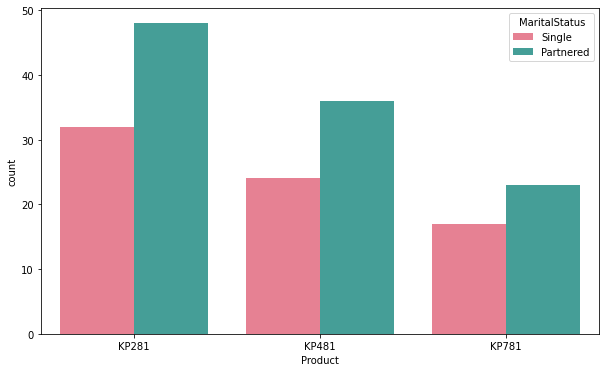

In [49]:
# Product purchased among Married/Partnered and Single
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='Product',hue='MaritalStatus',palette='husl')
plt.show()

From the above countplot

* KP281 is the most preferred product among customers
* KP481 is the second most preferred product among the customers
* Between Singles and Partnered, Partnered customers are the major product purchasers

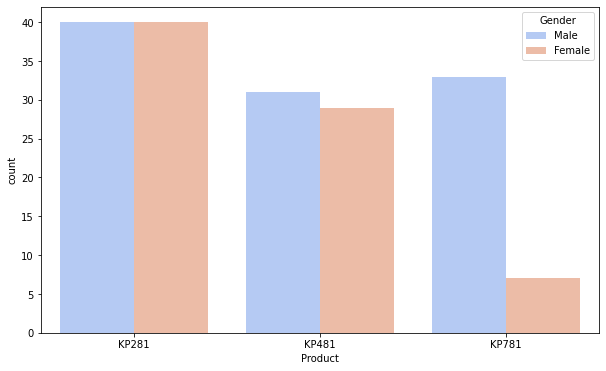

In [50]:
# Product purchased among Male and Female
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='Product',hue='Gender',palette='coolwarm')
plt.show()

* KP281 Product is the equally preferred by both male and female genders
* KP781 Product is mostly preferred among the Male customers
* Overall Male customers are the highest product purchasers

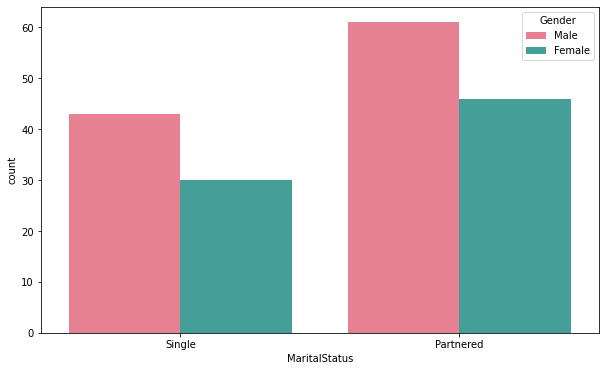

In [51]:
# Count among Gender and their Marital Status
plt.figure(figsize = (10,6))
sns.countplot(data=aerofit,x='MaritalStatus',hue='Gender',palette='husl')
plt.show()

* Partnered customers are the most buyers of aerofit product
* Out of both Single and Partnered customers, Male customers are significantly high
* Female customers are considerably low compared to Male customers

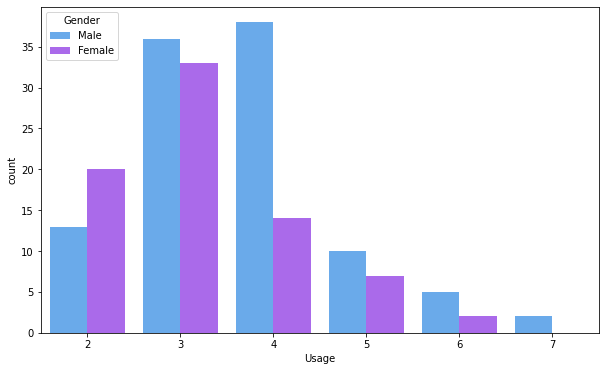

In [52]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit,x='Usage',hue='Gender',palette='cool')
plt.show()

* Among Male and Female genders, Male's usage is 4 days per week
* Female customers mostly use 3 days per week
* Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

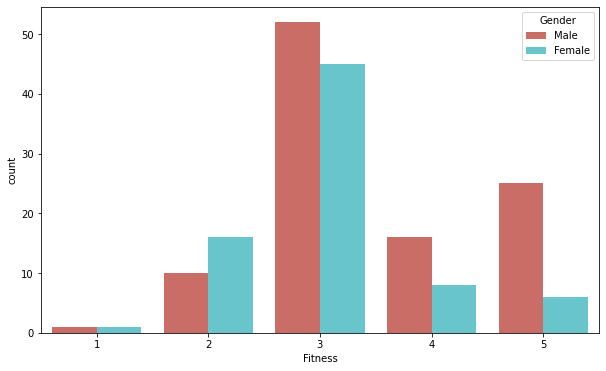

In [53]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit,x='Fitness',hue='Gender',palette='hls')
plt.show()

* Among the fitness rating both Male and Female most have rated as average
* Significant number of Male customers are at Excellent shape compared to Female customers

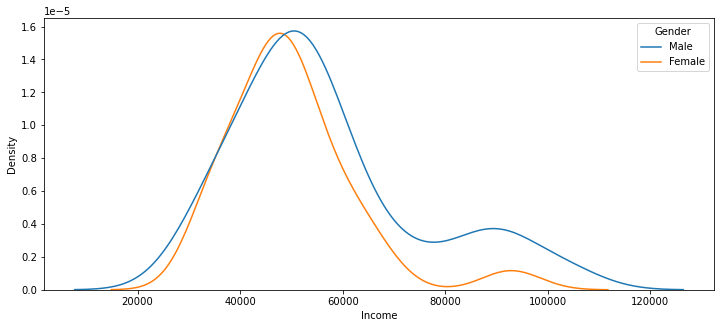

In [54]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Income',hue='Gender')
plt.show()

From the above diagram, we can conclude the spike from 40K to around 60K is the most common income per annum of the customers

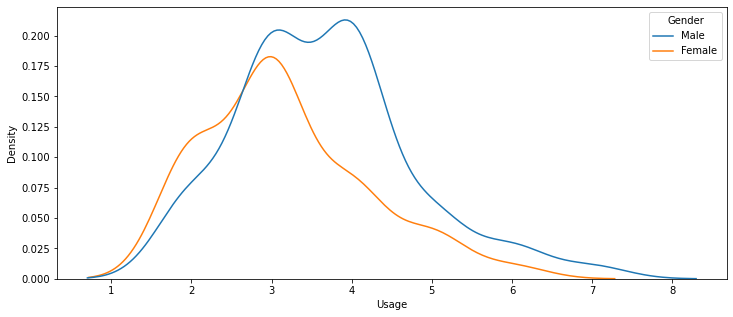

In [55]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Usage',hue='Gender')
plt.show()

* Male customers usage is significantly higher the female customer
* Female customer's lack consistency after the 3 days per week

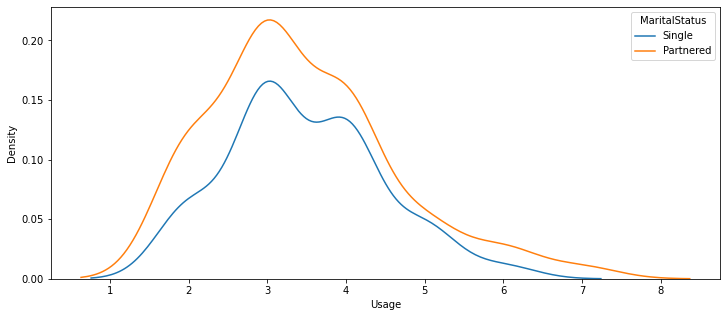

In [56]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Usage',hue='MaritalStatus')
plt.show()

* Partnered customers usage is higher than single customers
* Partnered customers also have greater consistency per week of 7 days per week than single customers

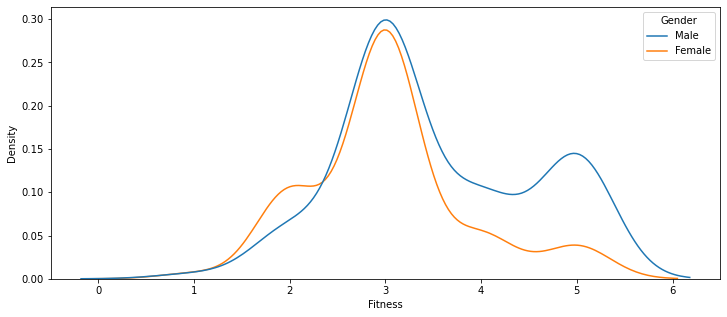

In [57]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Fitness',hue='Gender')
plt.show()

* Male customers are in better shape the female customers
* Though Female customers do not have poor shape, they are also not in excellent shape
* Some Male customers excellent body shape and few customers have poor shape as well

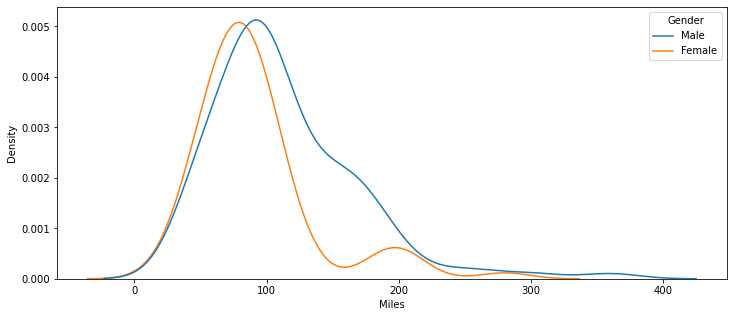

In [58]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Miles',hue='Gender')
plt.show()

* Male customers have a consistent distance coverage than female customers
* Female customers have max distance covered as just over 300 miles

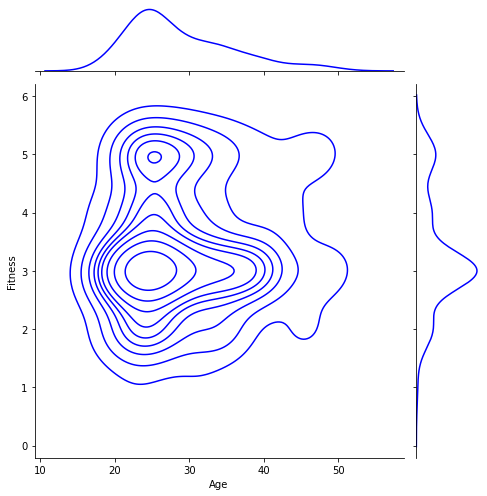

In [59]:
# Joint Histogram with KDE plot
sns.jointplot(x="Age", y="Fitness", data=aerofit,height = 7,kind="kde",color="blue")
plt.show()

* Majority of the customer Age group is between 20 to mid 30s who have rated atleast average

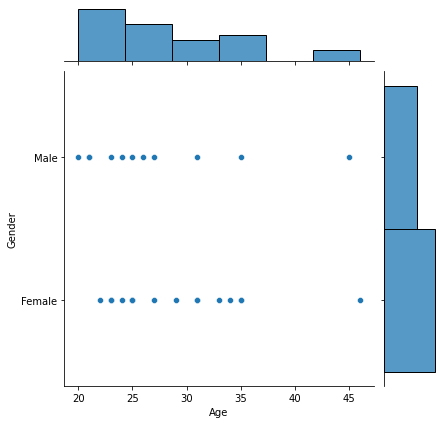

In [60]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=aerofit[aerofit.Fitness<3])
plt.show()

* Above Joint plot describes the relationship between the customer age and their gender grouping.
* Product is not familiar with older or middle age womens

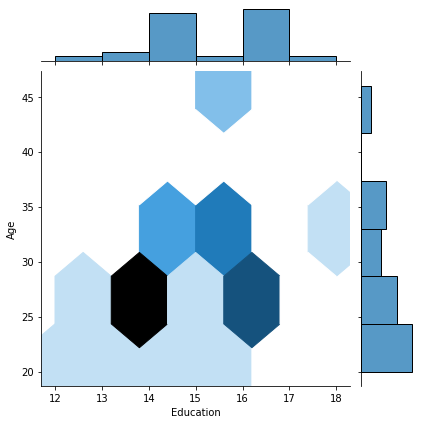

In [61]:
# Hex Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',kind='hex',data=aerofit[aerofit.Fitness<3])
plt.show()

* Majority of the age and education density falls on 25-30 age group and 13-14 education

<AxesSubplot:xlabel='Miles', ylabel='Income'>

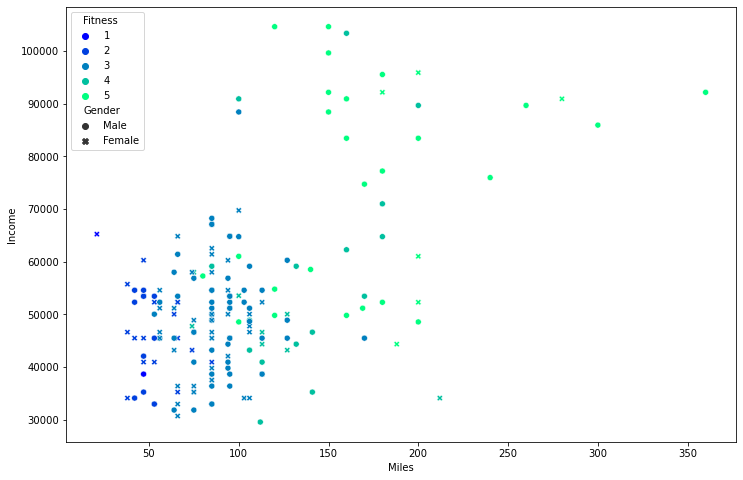

In [62]:
# Scatter Plot
plt.figure(figsize = (12,8))
sns.scatterplot(x='Miles',y='Income',data=aerofit,hue='Fitness',style='Gender',palette='winter')

* Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.
* Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.
* Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

<AxesSubplot:xlabel='Education', ylabel='Age'>

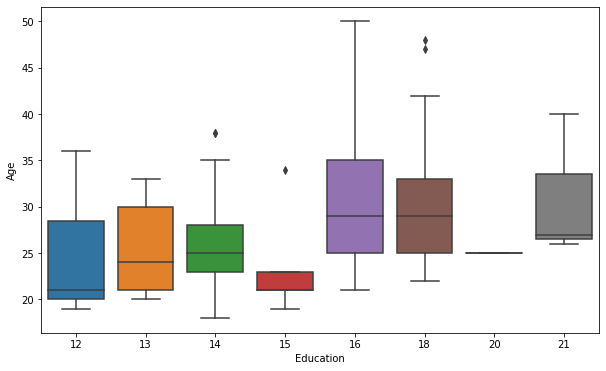

In [63]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Education',y='Age',data=aerofit)

* Above box plot shows Education data against Age of the customer

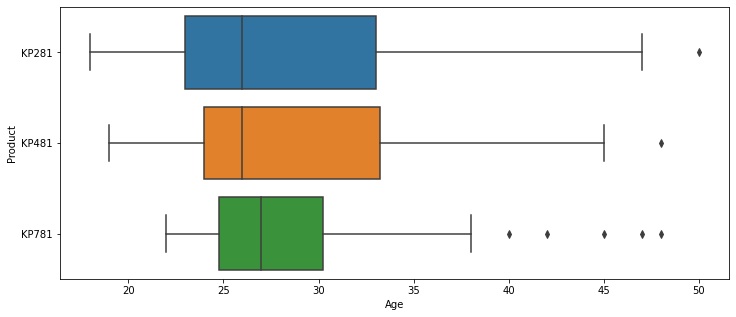

In [64]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=aerofit)
plt.show()

* Roughly few customers with age above 40 use product KP781
* Most of the customers are comfortable with KP281 product type
* KP481 is the second highest popular product among the younger side of the customer

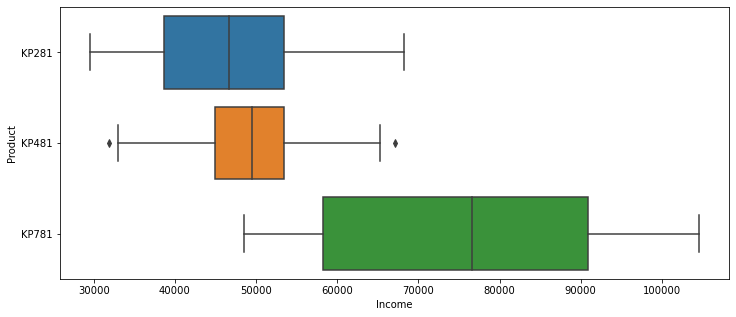

In [65]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Income',y='Product',data=aerofit)
plt.show()

* KP781 product mostly purcashed by the customer's having income higher than 57K.

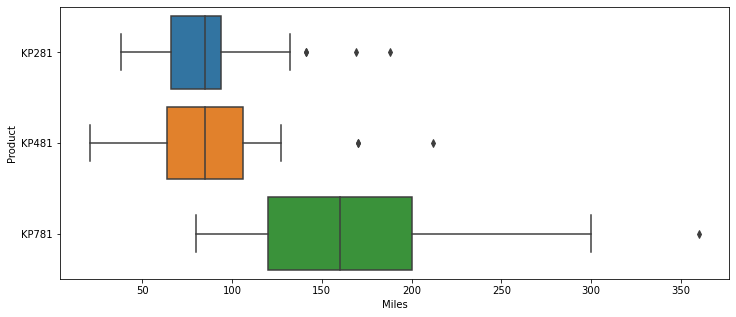

In [66]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=aerofit)
plt.show()

* Customers with product KP781, has been able to cover more miles than other two product types
* KP481 product is the second most highest miles covering product among the customers
* KP281 product customer had covered less distance compared with other two product types

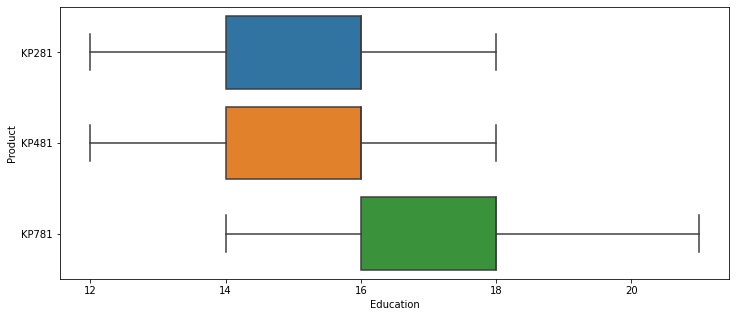

In [67]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=aerofit)
plt.show()

* Customers with Higher education of 16 to 18 have preferred mostly product type KP781
* Customers with education between 14 to 16 prefer KP281 and KP481 equally

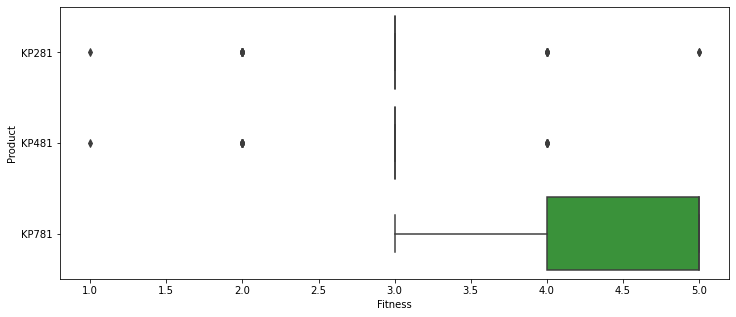

In [68]:
# Fitness of customer with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Product',data=aerofit)
plt.show()

* Customers with excellent shape are significantly using KP781 product type
* KP481 and KP281 product type are scattered across the fitness rating

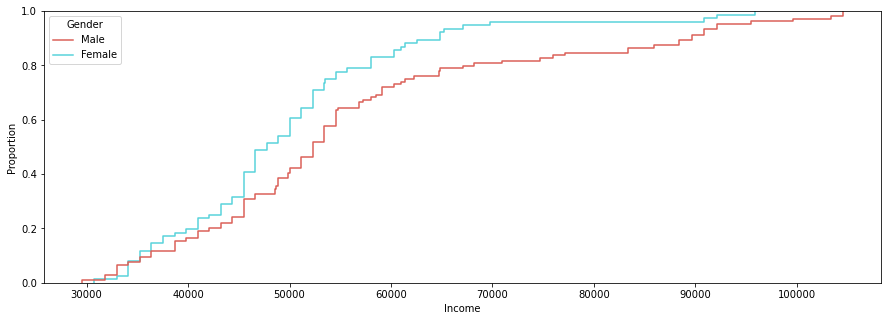

In [69]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Income',hue='Gender',complementary=False,palette='hls')
plt.show()

* Customers with minimum of 30K as annual income are the ones that are able to afford aerofit products
* Couple of Female customers less than 30K have also purchased aerofit product
* Male customers with Higher salaries are the most common purchasers of the product

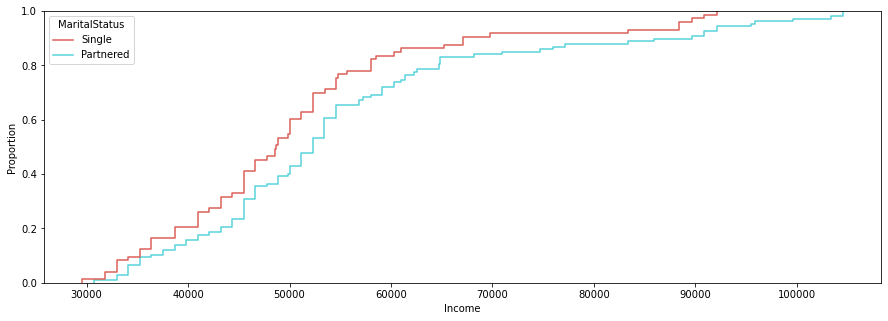

In [70]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Marital 
#Status
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Income',hue='MaritalStatus',complementary=False,palette='hls')
plt.show()

* Single customer have higher proportion than partnered customers
* Partnered customers are more than single customers and they also earn more than single customers

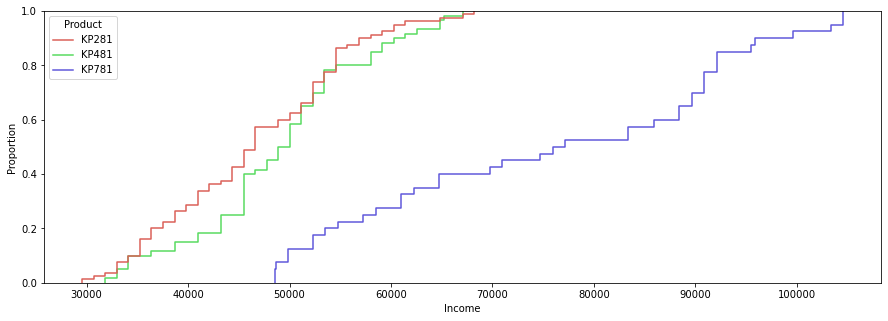

In [71]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Product
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Income',hue='Product',complementary=False,palette='hls')
plt.show()

* KP781 product mostly purcashed by the customer's having higher income.

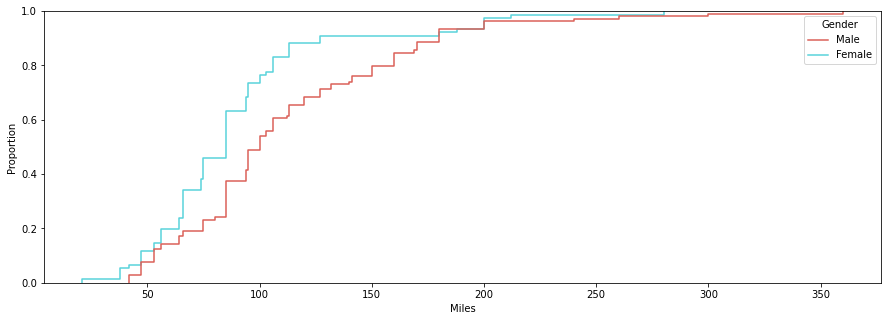

In [72]:
# Empirical Cumulative Distribution Function - proportional distribution for Miles of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Miles',hue='Gender',complementary=False,palette='hls')
plt.show()

* Female customers proportion is higher than the male customers
* Male customers cover more miles than female customer with lower proportion than female customers

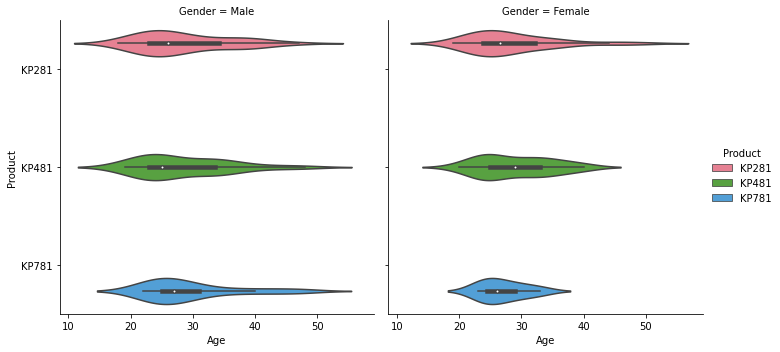

In [73]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=aerofit,kind='violin',palette='husl')
plt.show()

* From the above catplot, male customers are equally distributed among the three product types
* Female customers tend to use product KP281 and KP481 more than advanced KP781 product
* Female customers tend to prefer less complicated products than their male counterparts

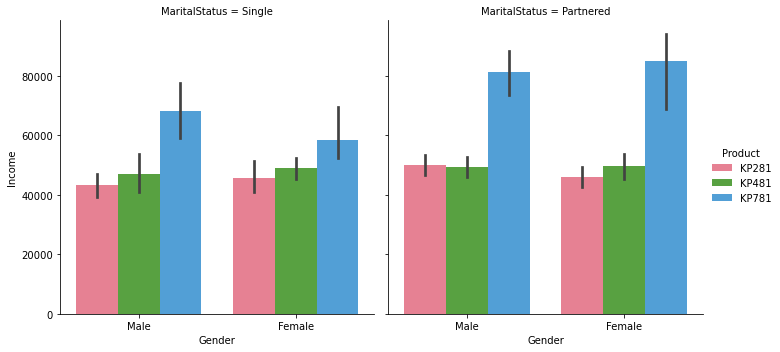

In [74]:
# Miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Income',hue='Product',col='MaritalStatus',data=aerofit,kind='bar',palette='husl')
plt.show()

* KP781 is most popular among the single and Partnered customers
* Among the both marital statuses, Single female does not prefer much of the products.
* Partnered Female bought KP781 treadmill slightly more as compared to Partnered Male.
* Single Female customers bought KP281 treadmill slightly less compared to Single Male customers.
* Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
* There are more single Males buying treadmill than single Females.
* Single Male customers bought more KP781 treadmill compared to single Female.
* Partnered customers are more than Single customers.

#### Outliers

Outliers for other categorical data are mentioned inline with the respective analysis

In [75]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(aerofit['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


### Business Insights based on Non-Graphical and Visual Analysis

In [76]:
aerofit.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of buying KP281, KP481 & KP781 are 0.44, 0.33 & 0.22 respectively

In [77]:
aerofit.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* Probability of Male customer is 0.57
* Probability of Female customer is 0.42

In [78]:
aerofit.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* Probability of Married/Partnered is 0.59
* Probability of Single is 0.40


#### Probability for each product for the both genders

In [79]:
def gender_Probability(gender,aerofit):
    print(f"Prob P(KP781) for {gender}: {round(aerofit['KP781'][gender]/aerofit.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(aerofit['KP481'][gender]/aerofit.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(aerofit['KP281'][gender]/aerofit.loc[gender].sum(),3)}")
    
df_temp = pd.crosstab(index=aerofit['Gender'],columns=[aerofit['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(aerofit),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(aerofit),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


#### Probability of each product for given Marital Status

In [80]:
def MS_Probability(ms_status,aerofit):
    print(f"Prob P(KP781) for {ms_status}: {round(aerofit['KP781'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(aerofit['KP481'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(aerofit['KP281'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=aerofit['MaritalStatus'],columns=[aerofit['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(aerofit),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(aerofit),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


### Customer Age Group Analysis

In [81]:
aerofit_cat['age_group'] = aerofit_cat.Age
aerofit_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [82]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
aerofit_cat.age_group = pd.cut(aerofit.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [83]:
aerofit_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [84]:
aerofit_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [85]:
aerofit_cat.loc[aerofit_cat.Product=='KP281']["age_group"].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [86]:
aerofit_cat.loc[aerofit_cat.Product=='KP481']["age_group"].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [87]:
aerofit_cat.loc[aerofit_cat.Product=='KP781']["age_group"].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [88]:
pd.crosstab(index=aerofit_cat.Product,columns=aerofit_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [89]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=aerofit_cat.Product,columns=aerofit_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [90]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=aerofit_cat.Product,columns=aerofit_cat.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [91]:
pd.crosstab(columns=aerofit_cat["Fitness_category"],index=aerofit_cat["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [92]:
round(pd.crosstab(index=aerofit_cat["Product"],columns=aerofit_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [93]:
pd.crosstab(index=[aerofit_cat.Product,aerofit_cat.Fitness_category],columns=aerofit_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [94]:
round(pd.crosstab(index=[aerofit_cat.Product,aerofit_cat.Fitness_category],columns=aerofit_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [95]:
round(pd.crosstab(index=[aerofit_cat.Product,aerofit_cat.MaritalStatus],columns=aerofit_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

## Conditional and Marginal Probabilities

#### Two-Way Contingency Table

#### Marginal Probabilities

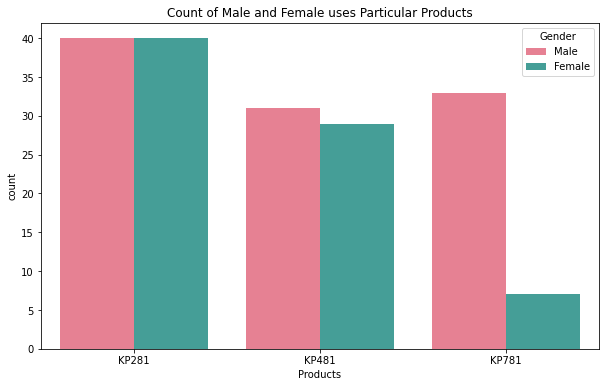

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Product", data= aerofit, hue = "Gender", palette = 'husl')
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [97]:
pd.crosstab([aerofit.Product],aerofit.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [98]:
np.round(((pd.crosstab(aerofit.Product,aerofit.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


#### Marginal Probability

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

#### Marginal Probability of any customer buying

* product KP281 is : 44.44 % (cheapest / entry level product)

* product KP481 is : 33.33 % (intermediate user level product)

* product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

#### Conditional Probabilities

In [99]:
np.round((pd.crosstab([aerofit.Product],aerofit.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

### Objective: Customer Profiling for Each Product

Customer profiling based on the 3 product categories provided

##### KP281

* Easily affordable entry level product, which is also the maximum selling product.

* KP281 is the most popular product among the entry level customers.

* This product is easily afforded by both Male and Female customers.

* Average distance covered in this model is around 70 to 90 miles.

* Product is used 3 to 4 times a week.

* Most of the customer who have purchased the product have rated Average shape as the fitness rating.

* Younger to Elder beginner level customers prefer this product.

* Single female & Partnered male customers bought this product more than single male customers.

* Income range between 39K to 53K have preferred this product.

##### KP481

* This is an Intermediate level Product.

* KP481 is the second most popular product among the customers.

* Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

* Customers Prefer this product mostly to cover more miles than fitness.

* Average distance covered in this product is from 70 to 130 miles per week.

* More Female customers prefer this product than males.

* Probability of Female customer buying KP481 is significantly higher than male.

* KP481 product is specifically recommended for Female customers who are intermediate user.

* Three different age groups prefer this product - Teen, Adult and middle aged.

* Average Income of the customer who buys KP481 is 49K.

* Average Usage of this product is 3 days per week.

* More Partnered customers prefer this product.

* There are slightly more male buyers of the KP481.

* The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

* The buyers of KP481 in Single & Partnered, Male & Female are same.

* The age range of KP481 treadmill customers is roughly between 24-34 years.

##### KP781

* Due to the High Price & being the advanced type, customer prefers less of this product.

* Customers use this product mainly to cover more distance.

* Customers who use this product have rated excelled shape as fitness rating.

* Customer walk/run average 120 to 200 or more miles per week on his product.

* Customers use 4 to 5 times a week at least.

* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

* Middle aged to higher age customers tend to use this model to cover more distance.

* KP781 product mostly purcashed by the customer's having income higher than 57K per annum

* Average Income of KP781 buyers are over 75K per annum

* Partnered Female bought KP781 treadmill compared to Partnered Male.

* Customers who have more experience with previous aerofit products tend to buy this product

* This product is preferred by the customer where the correlation between Education and Income is High.

### Recommendation

* Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more


* KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.


* As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.


* KP781 product should be promotted using influencers and other international atheletes.


* Research required for expanding market beyond 50 years of age considering health pros and cons.


* Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.


* KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.


* Target the Age group above 40 years to recommend Product KP781.